<a href="https://colab.research.google.com/github/Avigx/djs_compute_task/blob/main/Ufc_EDA_Avinash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("/ufc-fighters-statistics.csv")
print(df.shape) #gives rows and colums
print(df.head())
print(df.info())
print(df.describe())


(4111, 18)
                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                 

In [9]:
print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64
0


In [12]:
print(df.columns)


Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')


In [13]:
print(df['height_cm'].describe())
print(df['weight_in_kg'].describe())
print(df['reach_in_cm'].describe())



count    3813.000000
mean      178.234325
std         8.888050
min       152.400000
25%       172.720000
50%       177.800000
75%       185.420000
max       226.060000
Name: height_cm, dtype: float64
count    4024.000000
mean       77.395825
std        17.982242
min        47.630000
25%        65.770000
50%        77.110000
75%        83.910000
max       349.270000
Name: weight_in_kg, dtype: float64
count    2184.000000
mean      181.808874
std        10.680804
min       147.320000
25%       175.260000
50%       182.880000
75%       190.500000
max       213.360000
Name: reach_in_cm, dtype: float64


In [17]:
# Convert numeric columns if needed (forces coercion to numeric)
num_cols = ['wins','losses','draws','height_cm','weight_in_kg','reach_in_cm',
            'significant_strikes_landed_per_minute','significant_striking_accuracy',
            'significant_strikes_absorbed_per_minute','significant_strike_defence',
            'average_takedowns_landed_per_15_minutes','takedown_accuracy','takedown_defense',
            'average_submissions_attempted_per_15_minutes']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Parse date_of_birth
if 'date_of_birth' in df.columns:
    df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

# quick check
df[num_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   wins                                          4111 non-null   int64  
 1   losses                                        4111 non-null   int64  
 2   draws                                         4111 non-null   int64  
 3   height_cm                                     3813 non-null   float64
 4   weight_in_kg                                  4024 non-null   float64
 5   reach_in_cm                                   2184 non-null   float64
 6   significant_strikes_landed_per_minute         4111 non-null   float64
 7   significant_striking_accuracy                 4111 non-null   float64
 8   significant_strikes_absorbed_per_minute       4111 non-null   float64
 9   significant_strike_defence                    4111 non-null   f

In [19]:
# IQR-based bounds function
def iqr_bounds(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

# Compute for weight, height, reach
for col in ['weight_in_kg','height_cm','reach_in_cm']:
    if col in df.columns:
        s = df[col].dropna()
        lower, upper = iqr_bounds(s)
        print(f"{col} IQR bounds: {lower:.2f} - {upper:.2f}")
        print("Outliers above upper bound (sample):")
        print(df[df[col] > upper][['name', col]].head(10))
        print("Outliers below lower bound (sample):")
        print(df[df[col] < lower][['name', col]].head(5))
        print("-"*40)



weight_in_kg IQR bounds: 38.56 - 111.12
Outliers above upper bound (sample):
               name  weight_in_kg
9        Neil Grove        120.20
10   Raphael Butler        118.39
50      Tom Erikson        127.01
56    Shamil Gaziev        120.20
94    Sean McCorkle        120.20
106     Dan Evensen        113.40
148   Rob Broughton        120.20
167      Jan Nortje        140.61
170    Marcus Jones        120.20
180    Ron Waterman        127.01
Outliers below lower bound (sample):
Empty DataFrame
Columns: [name, weight_in_kg]
Index: []
----------------------------------------
height_cm IQR bounds: 153.67 - 204.47
Outliers above upper bound (sample):
                   name  height_cm
240            Wes Sims     208.28
408       Stefan Struve     210.82
661        Semmy Schilt     208.28
1445  Paulo Cesar Silva     226.06
2270          Gan McGee     208.28
2819      Cory Peterson     210.82
2894    Chi Lewis-Parry     205.74
3822      Hong Man Choi     218.44
3828       Nathan Jones  

In [20]:
import numpy as np

# define plausible ranges
bounds = {
    'height_cm': (140, 220),
    'weight_in_kg': (45, 160),
    'reach_in_cm': (140, 220)
}

# Flag rows outside plausible ranges
for col, (low, high) in bounds.items():
    if col in df.columns:
        mask = ~df[col].between(low, high)  # True for outside
        count = mask.sum()
        print(f"{col}: {count} rows outside plausible range [{low}, {high}]")
        # show offending rows for manual inspection
        print(df.loc[mask, ['name', col]].head(10))
        print()


height_cm: 299 rows outside plausible range [140, 220]
                    name  height_cm
34   Fazlo Mulabitinovic        NaN
38            Ron Keslar        NaN
39       Bobby McAndrews        NaN
47            Ilya Kotau        NaN
77         Nik Theotikos        NaN
88       Masakatsu Okuda        NaN
98            Kain Royer        NaN
208           Kyle Kurtz        NaN
268     Everett Cummings        NaN
295        Mike Zichelle        NaN

weight_in_kg: 95 rows outside plausible range [45, 160]
                   name  weight_in_kg
35           J.T Taylor           NaN
39      Bobby McAndrews           NaN
88      Masakatsu Okuda           NaN
1445  Paulo Cesar Silva        174.63
1808      Mike Minniger           NaN
1817      Helena Crevar           NaN
1843    Emily Fernandez           NaN
1855      Nick Meregali           NaN
1879        Eric Martin           NaN
1940      Kyle Levinton           NaN

reach_in_cm: 1927 rows outside plausible range [140, 220]
               

In [21]:
df.loc[df['weight_in_kg'] > 200, 'weight_in_kg'] = np.nan
df.loc[df['height_cm'] > 230, 'height_cm'] = np.nan
df.loc[df['reach_in_cm'] < 120, 'reach_in_cm'] = np.nan

In [22]:
# Show the extreme-weight rows before/after cleanup to decide what to do next
extreme_weight_rows = df[df['weight_in_kg'].isnull() | (df['weight_in_kg'] > 140)]
extreme_weight_rows[['name','weight_in_kg','height_cm','reach_in_cm']].sort_values(by='weight_in_kg', ascending=False).head(20)


,name,weight_in_kg,height_cm,reach_in_cm
2731,Teila Tuli,195.04,182.88,NaN
3815,Thomas Ramirez,185.97,185.42,NaN
2819,Cory Peterson,181.44,210.82,NaN
3174,John Matua,181.44,187.96,NaN
2928,Wagner da Conceicao Martins,176.90,200.66,NaN
3814,Alexandru Lungu,174.63,182.88,NaN
1445,Paulo Cesar Silva,174.63,226.06,NaN
321,Eric Esch,158.76,180.34,NaN
2984,Bob Sapp,158.76,195.58,NaN
2001,Koji Kitao,158.76,200.66,NaN


In [30]:
Q1 = df["weight_in_kg"].quantile(0.25)
Q3 = df["weight_in_kg"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["weight_in_kg"] >= (Q1 - 1.5*IQR)) & (df["weight_in_kg"] <= (Q3 + 1.5*IQR))]

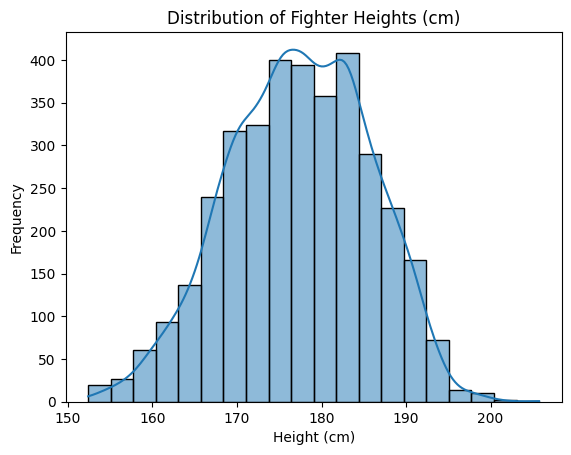

In [26]:
sns.histplot(df['height_cm'].dropna(), kde=True, bins=20)
plt.title("Distribution of Fighter Heights (cm)")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()


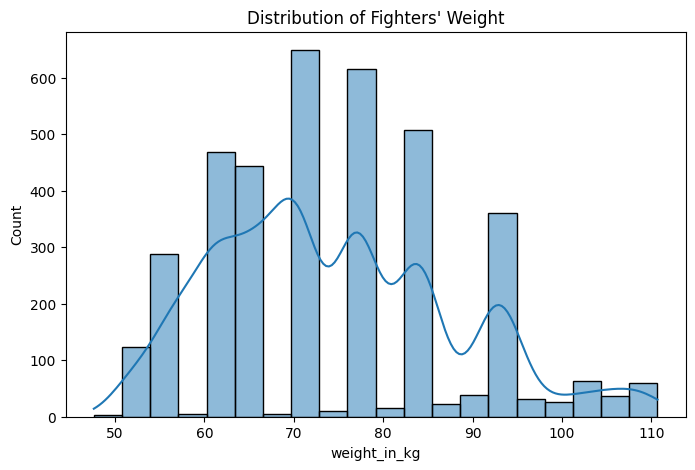

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df["weight_in_kg"], bins=20, kde=True)
plt.title("Distribution of Fighters' Weight")
plt.show()

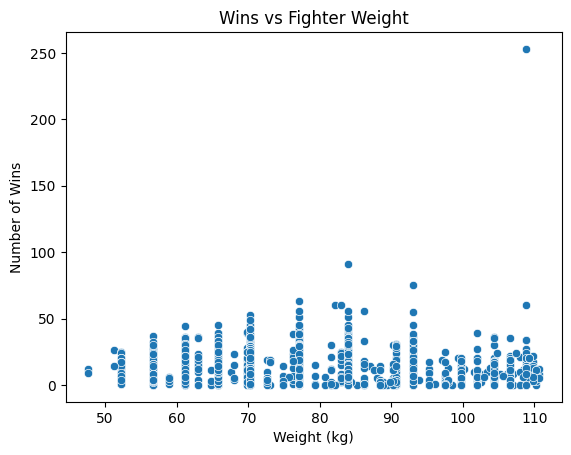

In [29]:
sns.scatterplot(x='weight_in_kg', y='wins', data=df)
plt.title("Wins vs Fighter Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Number of Wins")
plt.show()

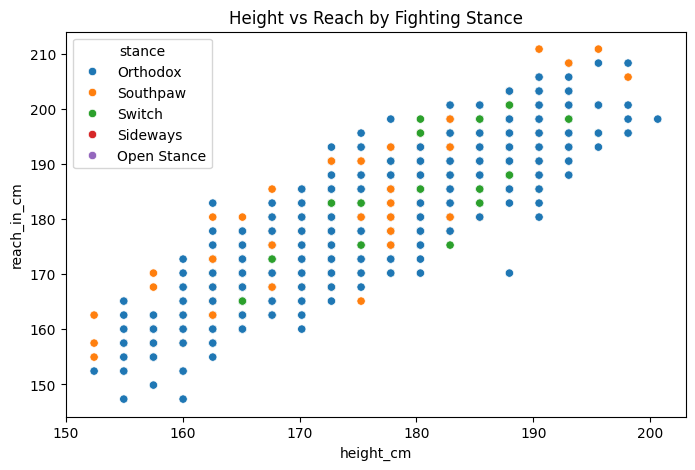

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="height_cm", y="reach_in_cm", data=df, hue="stance")
plt.title("Height vs Reach by Fighting Stance")
plt.show()

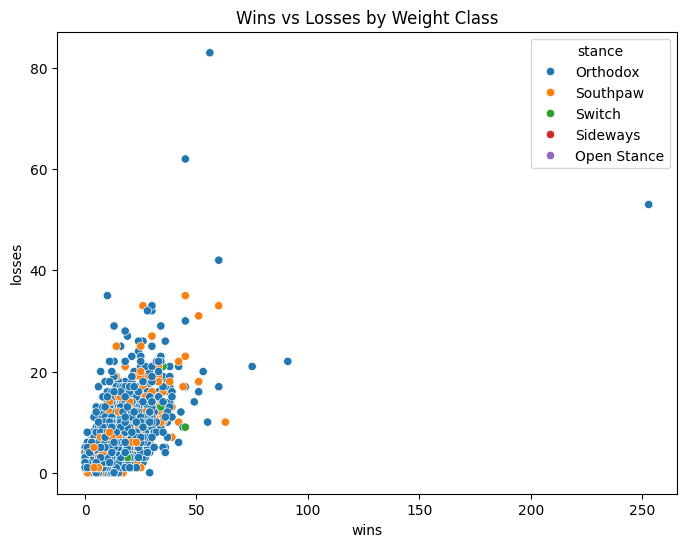

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="wins", y="losses", data=df, hue="stance")
plt.title("Wins vs Losses by Stance")
plt.show()

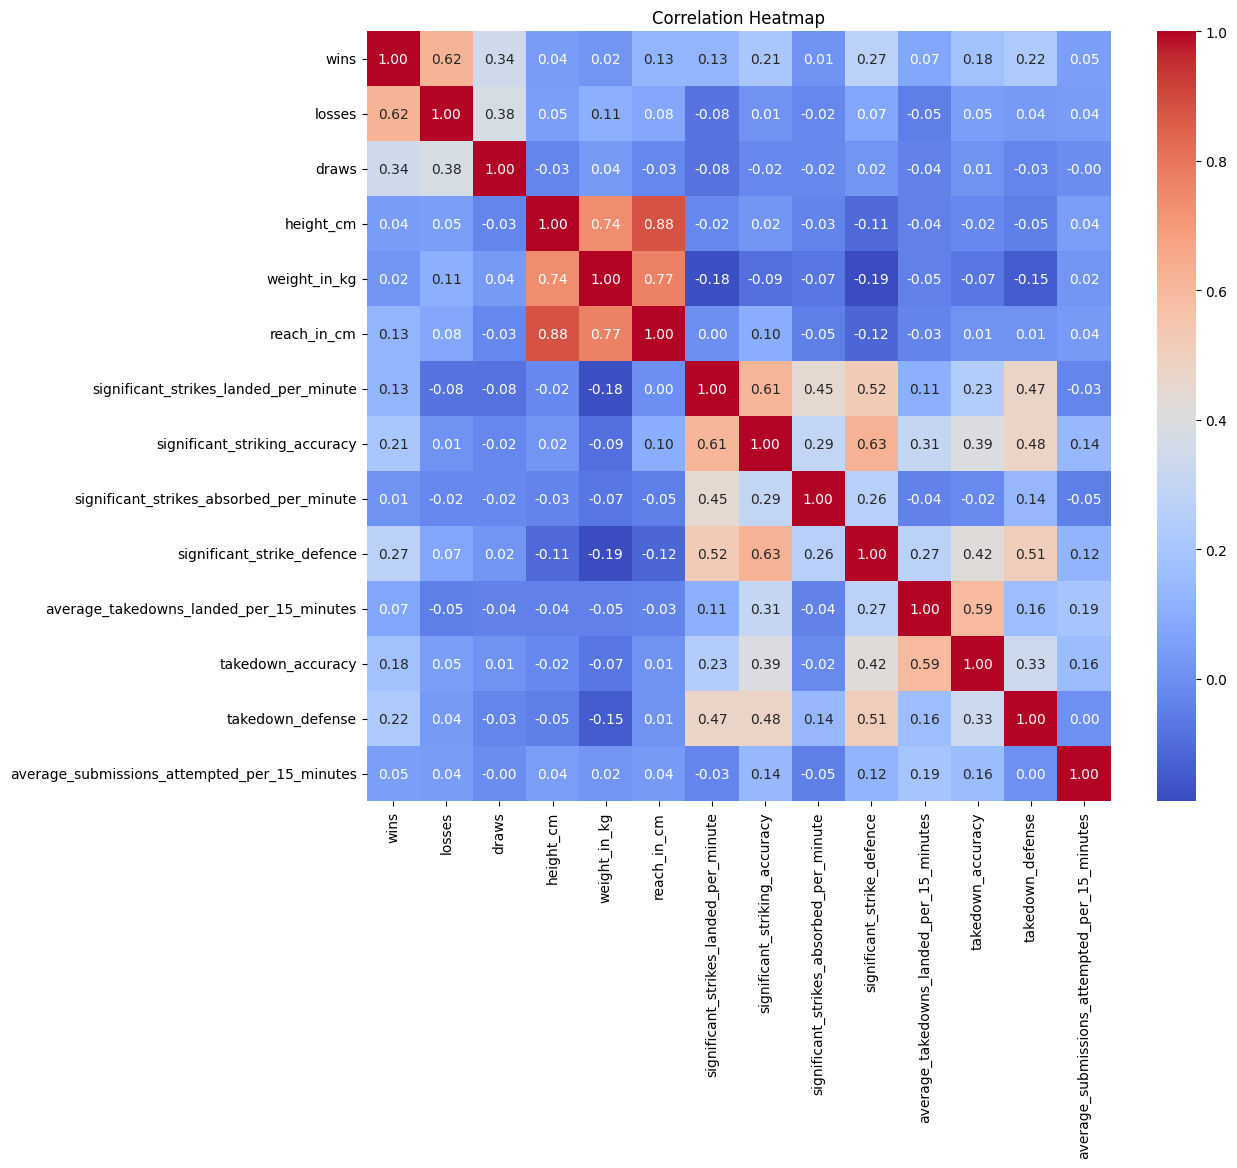

In [39]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
